### Student Name: Jose Zacarias
### Studen tID: N01663659

# Assignment 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, feature

### 1) Line detection on sudoku

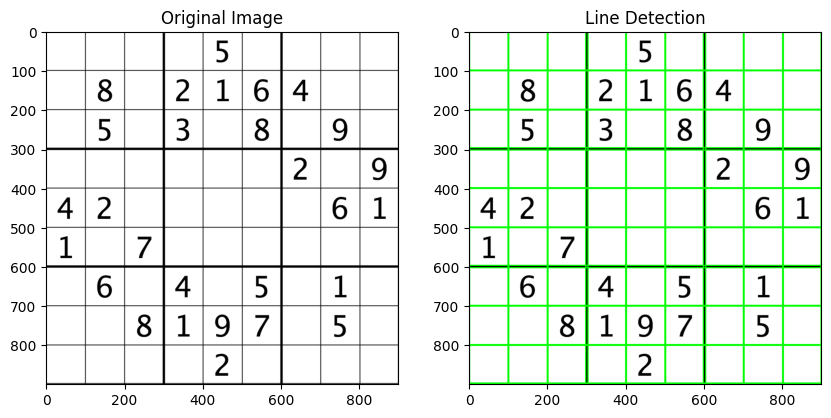

In [10]:
image_path = 'sudoku.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Drawing the lines on the img
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title("Line Detection")

plt.show()


### 2) Circle detection

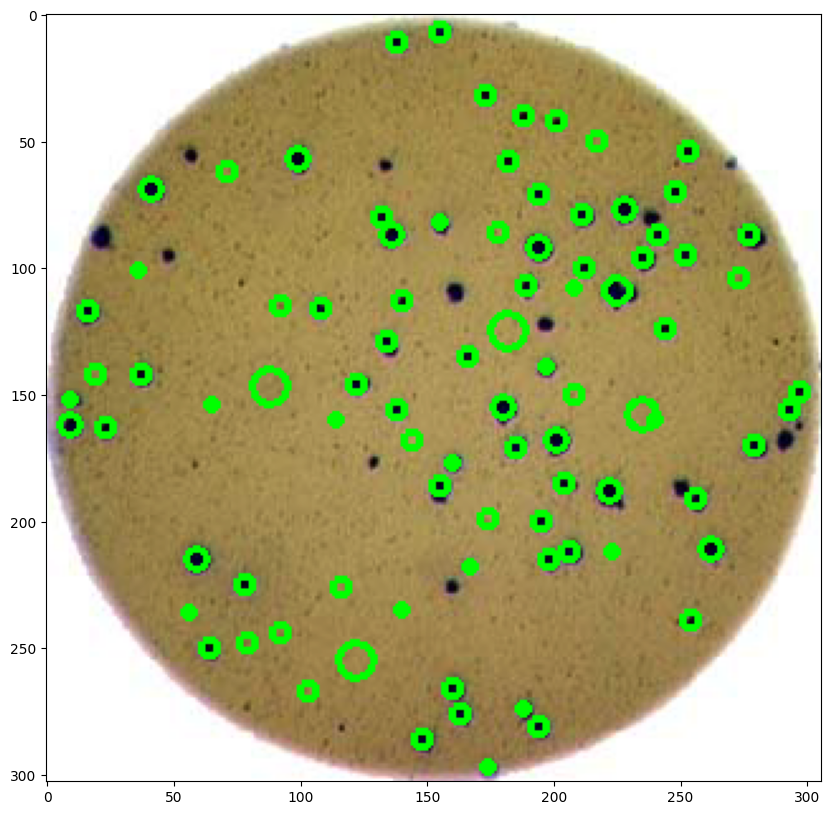

In [75]:
image_path = 'colonies-02.tif'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

# detecting circles
circles = cv2.HoughCircles(
    blurred_image, 
    cv2.HOUGH_GRADIENT, 
    dp=0.8, 
    minDist=5, 
    param1=10, 
    param2=10, 
    maxRadius=8
)

# Draw the detected circles on the original image
output_image = image.copy()
if circles is not None:
    circles = circles[0, :].astype(int)
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()


### 3) Contours Detection
**NOTE:** As the img "contours.jpg" does not exists Im using "chair.tif"

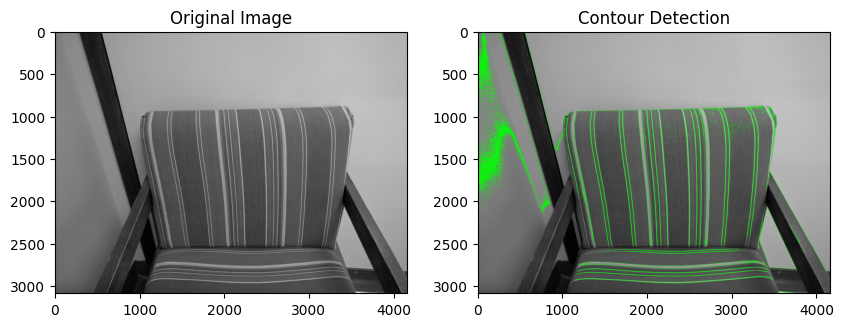

In [11]:
image_path_chair = 'chair.tif'
image_chair = cv2.imread(image_path_chair, cv2.IMREAD_GRAYSCALE)

# Apply threshold to get a binary image
_, thresh = cv2.threshold(image_chair, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the image
image_with_contours = cv2.cvtColor(image_chair, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_chair, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Contour Detection")

plt.show()


### 4) HOG Detection

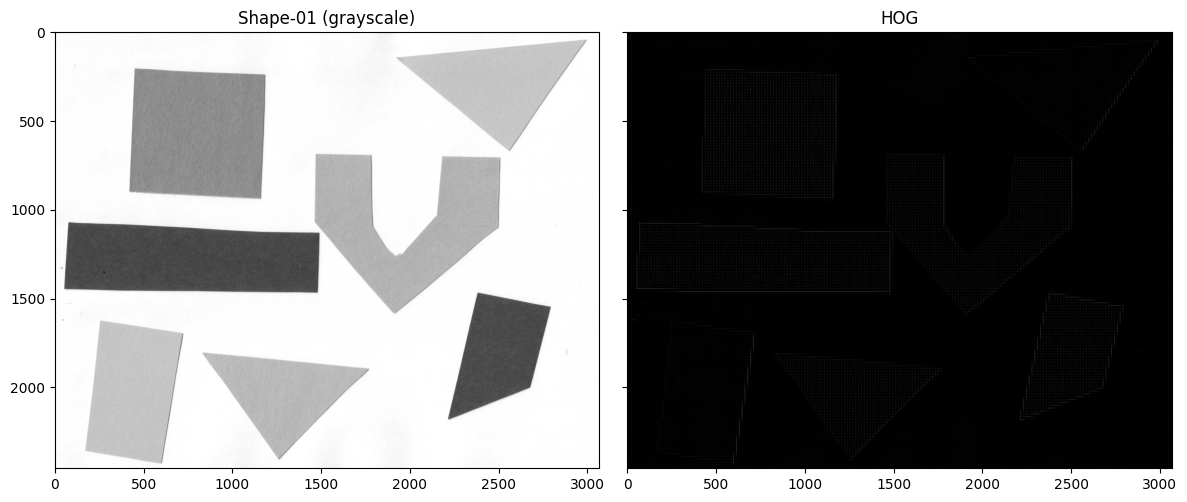

Shape of HOG features: (263007,)


In [6]:
image = io.imread('shapes-01.jpg')


gray_image = color.rgb2gray(image)

hog_features, hog_image = feature.hog(
    gray_image,
    visualize=True,
    block_norm='L2-Hys',
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    orientations=9,
    feature_vector=True,
    channel_axis=None  # Explicitly state we're working with a 2D image
)

# Display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title('Shape-01 (grayscale)')

ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG')

plt.tight_layout()
plt.show()